<a href="https://colab.research.google.com/github/Faliirham/PCVK25_3F_11/blob/main/Week8(CM)_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CASE METHOD (BATIK) PERTEMUAN 8***

**Fali Irham Maulana / 2341720121**

**TI 3F**

---

Bagian A – Observasi & Eksperimen
Gunakan 3 citra batik / sayur (misalnya data1.jpg, data2.jpg, data3.jpg) dengan variasi
kondisi cahaya.
Ambil 3 foto data sesuai object yang dipilih di tempat berbeda:
1. Dalam ruangan minim cahaya (lampu Sebagian mati)
2. Di bawah lampu terang
3. Di samping jendela dengan cahaya datang dari satu arah

In [1]:
#Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

In [2]:
#Load Gambar
!pip install gdown
from IPython.display import clear_output
clear_output()
!gdown --id "13tpbzrutmo7ARMTO2KK898yYrOuCDKry"

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13tpbzrutmo7ARMTO2KK898yYrOuCDKry
To: /content/setengah.jpg
100% 152k/152k [00:00<00:00, 101MB/s]


1. Tampilkan histogram tiap citra dan analisis distribusi intensitasnya.

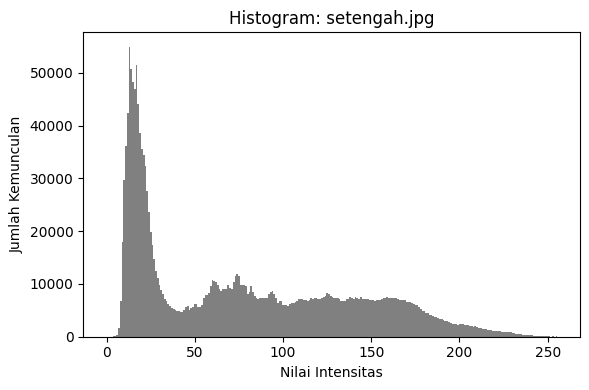

In [3]:
#Histogram Greyscale
setengah = cv2.imread('setengah.jpg')

plt.figure(figsize=(6,4))
hist_gmbr, bins_img = np.histogram(setengah, bins=256, range=(0, 256))

#Visualisasi Histogram
plt.title('Histogram: setengah.jpg')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.bar(bins_img[:-1], hist_gmbr, width=1, color='gray')

plt.tight_layout()
plt.show()

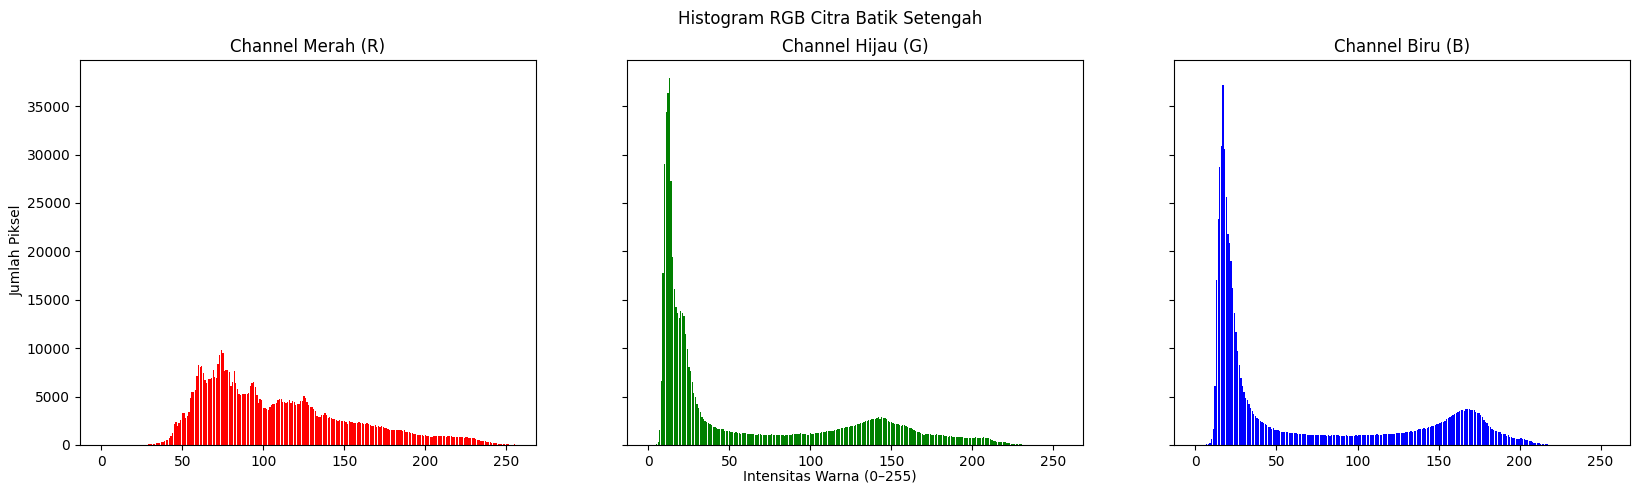

In [4]:
# Baca gambar dan ubah ke RGB
img = cv2.imread('setengah.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mengambil nilai tiap channel R G B
red, bins = np.histogram(img[:,:,0].ravel(), bins=256, range=[0,256])
green, bins = np.histogram(img[:,:,1].ravel(), bins=256, range=[0,256])
blue, bins = np.histogram(img[:,:,2].ravel(), bins=256, range=[0,256])

# Visualisasi histogram RGB
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB Citra Batik Setengah')
fig.text(0.09, 0.5, 'Jumlah Piksel', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna (0–255)', ha='center')

axs[0].bar(names, red, color='red')
axs[0].set_title('Channel Merah (R)')

axs[1].bar(names, green, color='green')
axs[1].set_title('Channel Hijau (G)')

axs[2].bar(names, blue, color='blue')
axs[2].set_title('Channel Biru (B)')

plt.show()

2. Terapkan transformasi brightness dan contrast (linear/log brightness).
- Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar data
tampak natural seperti data asli.

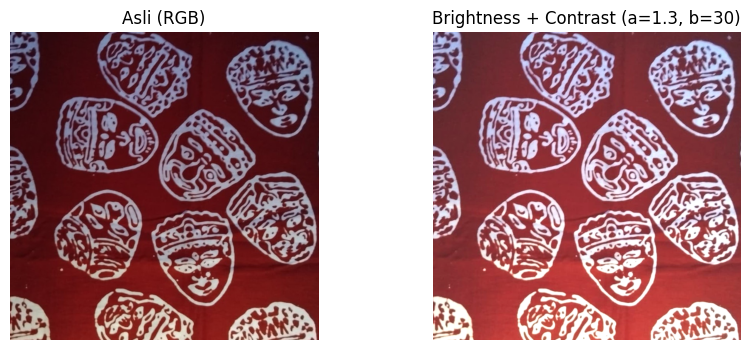

In [5]:
# Nilai brightness dan contrast
b = 30     # brightness
a = 1.3    # contrast

# Terapkan transformasi brightness dan contrast pada citra RGB
img_bc = cv2.convertScaleAbs(img, alpha=a, beta=b)

# Tampilkan hasil
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Asli (RGB)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_bc)
plt.title(f'Brightness + Contrast (a={a}, b={b})')
plt.axis('off')
plt.show()

3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.
- Bandingkan hasil visual dan histogram sebelum–sesudah.
- Perhatikan apakah motif dan detail kain lebih terlihat jelas

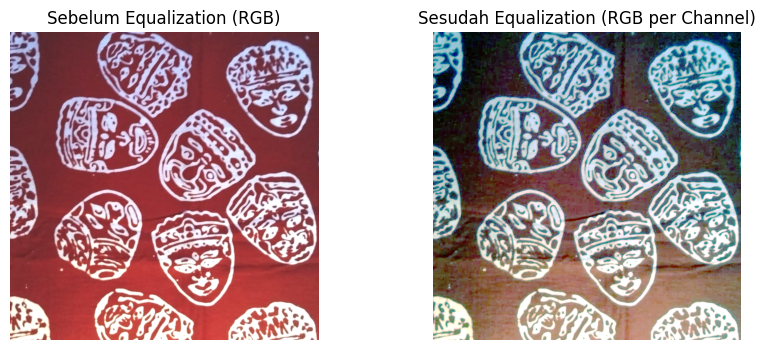

In [6]:
# Memiisahkan channel RGB
r, g, b = cv2.split(img_bc)

# Equalize masing-masing channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Gabungkan kembali hasil equalization
img_he = cv2.merge((r_eq, g_eq, b_eq))

# Tampilkan perbandingan sebelum dan sesudah
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_bc)
plt.title('Sebelum Equalization (RGB)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_he)
plt.title('Sesudah Equalization (RGB per Channel)')
plt.axis('off')
plt.show()

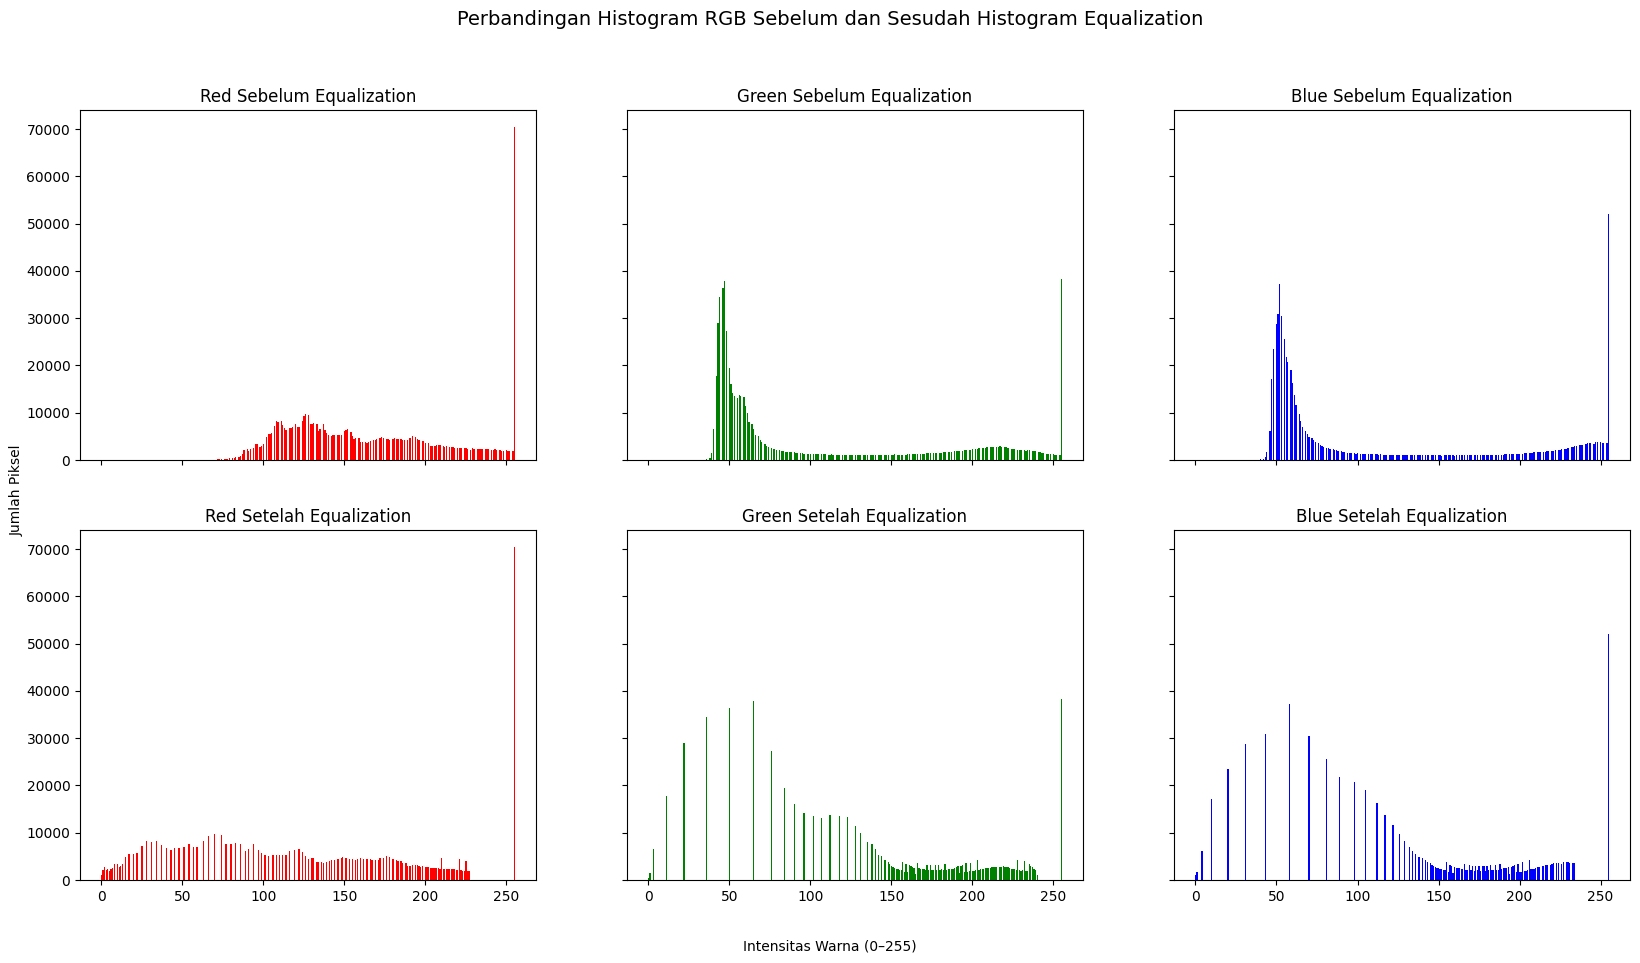

In [7]:
# Histogram RGB Asli
r1, bins = np.histogram(img_bc[:,:,0].ravel(), bins=256, range=[0,256])
g1, bins = np.histogram(img_bc[:,:,1].ravel(), bins=256, range=[0,256])
b1, bins = np.histogram(img_bc[:,:,2].ravel(), bins=256, range=[0,256])

# Histogram RGB Setelah Equalization
r2, bins = np.histogram(img_he[:,:,0].ravel(), bins=256, range=[0,256])
g2, bins = np.histogram(img_he[:,:,1].ravel(), bins=256, range=[0,256])
b2, bins = np.histogram(img_he[:,:,2].ravel(), bins=256, range=[0,256])

names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Perbandingan Histogram RGB Sebelum dan Sesudah Histogram Equalization', fontsize=14)
fig.text(0.09, 0.5, 'Jumlah Piksel', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna (0–255)', ha='center')

# Sebelum Ewualization
axs[0,0].bar(names, r1, color='red')
axs[0,0].set_title('Red Sebelum Equalization')

axs[0,1].bar(names, g1, color='green')
axs[0,1].set_title('Green Sebelum Equalization')

axs[0,2].bar(names, b1, color='blue')
axs[0,2].set_title('Blue Sebelum Equalization')

# Sesudah Equalization
axs[1,0].bar(names, r2, color='red')
axs[1,0].set_title('Red Setelah Equalization')

axs[1,1].bar(names, g2, color='green')
axs[1,1].set_title('Green Setelah Equalization')

axs[1,2].bar(names, b2, color='blue')
axs[1,2].set_title('Blue Setelah Equalization')

plt.show()

4. Terapkan filter spasial:
- Low-pass filter untuk menghaluskan noise atau tekstur berlebih pada
permukaan kain, untuk menghaluskan noise pada permukaan atau
bayangan di sekitar sayur.
- High-pass atau Laplacian filter untuk menajamkan tepi motif batik atau
untuk menajamkan tepi daun, batang, atau detail tekstur pada sayur.

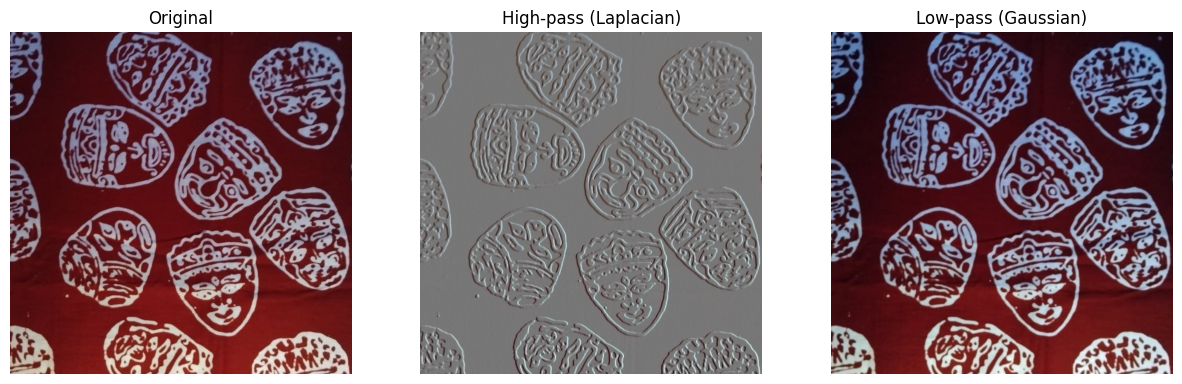

In [17]:
#Filter Spasial Pada Gambar RGB
# Low-pass (Gaussian)
kernel_lowpass = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32)
kernel_lowpass = kernel_lowpass / np.sum(kernel_lowpass)

# High-pass (Laplacian)
kernel_highpass = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

low_pass_channels = []
high_pass_channels = []

for i in range(3):  # R, G, B
    channel = img[:,:,i]
    low_pass_conv = convolve2d(channel, kernel_lowpass, mode='same', boundary='symm')
    high_pass_conv = convolve2d(channel, kernel_highpass, mode='same', boundary='symm')

    # Normalisasi
    low_pass_norm = cv2.normalize(low_pass_conv, None, 0, 255, cv2.NORM_MINMAX)
    high_pass_norm = cv2.normalize(high_pass_conv, None, 0, 255, cv2.NORM_MINMAX)

    low_pass_channels.append(low_pass_norm)
    high_pass_channels.append(high_pass_norm)

# Menggabungkan channel RGB
low_pass = cv2.merge([np.uint8(low_pass_channels[0]),
                      np.uint8(low_pass_channels[1]),
                      np.uint8(low_pass_channels[2])])

high_pass = cv2.merge([np.uint8(high_pass_channels[0]),
                       np.uint8(high_pass_channels[1]),
                       np.uint8(high_pass_channels[2])])

# === Visualisasi hasil ===
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,)
plt.imshow(low_pass)
plt.title('Low-pass (Gaussian)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(high_pass)
plt.title('High-pass (Laplacian)')
plt.axis('off')

plt.show()

/tmp/ipython-input-2340141510.py:10: RuntimeWarning: divide by zero encountered in divide
  kernel_lowpass = kernel_lowpass / np.sum(kernel_lowpass)
/tmp/ipython-input-2340141510.py:26: RuntimeWarning: invalid value encountered in cast
  low_pass = np.uint8(low_pass)


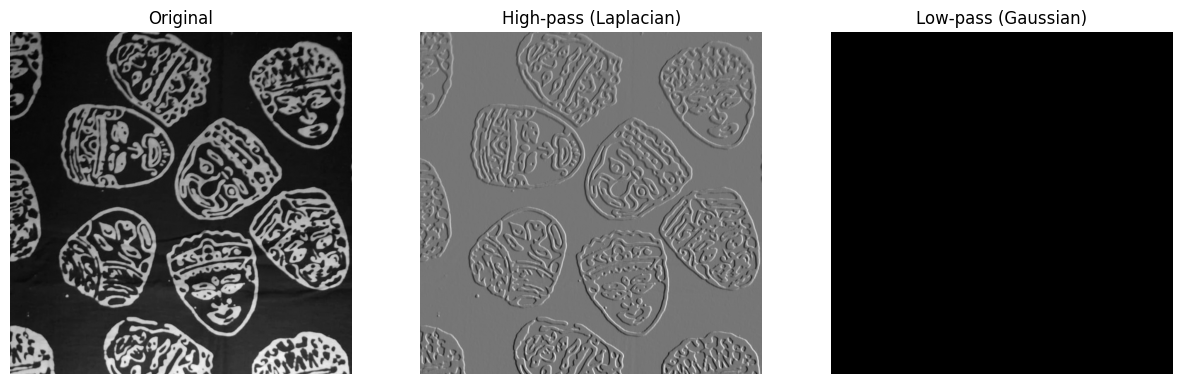

In [18]:
#Filter Spasial Pada Gambar GRAYSCALE
img_gray = cv2.cvtColor(setengah, cv2.COLOR_BGR2GRAY)

# Low-pass (Gaussian)
kernel_lowpass = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)
kernel_lowpass = kernel_lowpass / np.sum(kernel_lowpass)

# High-pass (Emboss)
kernel_highpass = np.array([
    [-1, 0, 1],
    [-1, 0, 3],
    [-3, 0, 1]
], dtype=np.float32)


low_pass = convolve2d(img_gray, kernel_lowpass, mode='same', boundary='symm')
high_pass = convolve2d(img_gray, kernel_highpass, mode='same', boundary='symm')

low_pass = cv2.normalize(low_pass, None, 0, 255, cv2.NORM_MINMAX)
high_pass = cv2.normalize(high_pass, None, 0, 255, cv2.NORM_MINMAX)

low_pass = np.uint8(low_pass)
high_pass = np.uint8(high_pass)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(low_pass, cmap='gray')
plt.title('Low-pass (Gaussian)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(high_pass, cmap='gray')
plt.title('High-pass (Laplacian)')
plt.axis('off')

plt.show()

5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman
warna sesuai data anda (bit-depth 4–6 bit), lalu analisis bagaimana efeknya
terhadap kehalusan gradasi warna motif batik setelah reduksi warna dilakukan
atau terhadap detail warna alami sayur

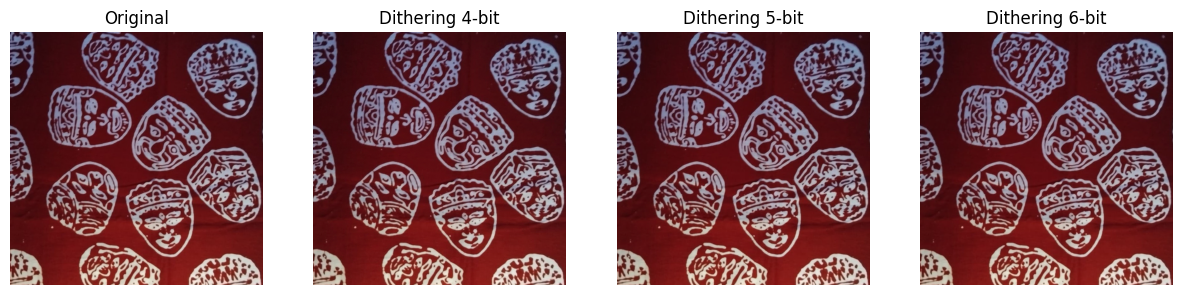

In [10]:
def floyd_steinberg_dithering(img, bit_depth):
    img_dither = img.astype(np.float32) / 255.0
    h, w, c = img_dither.shape
    levels = 2 ** bit_depth
    dithered_channels = []

    for i in range(c):
        channel = np.copy(img_dither[:,:,i])
        for y in range(h - 1):
            for x in range(1, w - 1):
                old = channel[y, x]
                new = np.round(old * (levels - 1)) / (levels - 1)
                channel[y, x] = new
                err = old - new
                channel[y, x + 1] += err * 7 / 16
                channel[y + 1, x - 1] += err * 3 / 16
                channel[y + 1, x] += err * 5 / 16
                channel[y + 1, x + 1] += err * 1 / 16
        dithered_channels.append(np.clip(channel, 0, 1))

    return cv2.merge([np.uint8(dithered_channels[0] * 255),
                       np.uint8(dithered_channels[1] * 255),
                       np.uint8(dithered_channels[2] * 255)])

# Menerapkan pada Bit Depth 4-6
dither_4 = floyd_steinberg_dithering(img, 4)
dither_5 = floyd_steinberg_dithering(img, 5)
dither_6 = floyd_steinberg_dithering(img, 6)

# Visualisasi hasil urut 4–6 bit
titles = ['Original', 'Dithering 4-bit', 'Dithering 5-bit', 'Dithering 6-bit']
images = [img, dither_4, dither_5, dither_6]

plt.figure(figsize=(15,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()